<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
import pandas as pd
import numpy as np
import gensim
import re
import spacy
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore


In [2]:
amazon = pd.read_csv('./data/Datafiniti_Amazon/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
amazon.shape

(28332, 24)

In [3]:
amazon.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [4]:
list(amazon)

['id',
 'dateAdded',
 'dateUpdated',
 'name',
 'asins',
 'brand',
 'categories',
 'primaryCategories',
 'imageURLs',
 'keys',
 'manufacturer',
 'manufacturerNumber',
 'reviews.date',
 'reviews.dateSeen',
 'reviews.didPurchase',
 'reviews.doRecommend',
 'reviews.id',
 'reviews.numHelpful',
 'reviews.rating',
 'reviews.sourceURLs',
 'reviews.text',
 'reviews.title',
 'reviews.username',
 'sourceURLs']

In [5]:
amazon['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Electronics,Furniture              2
Home & Garden                      2
Name: primaryCategories, dtype: int64

In [6]:
#make a copy with only electronics items
df = amazon[amazon['primaryCategories'] == 'Electronics'].copy()
df.shape

(13995, 24)

In [7]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
8343,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...
8344,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,NaN,5,http://www.amazon.co.uk/gp/product-reviews/B00...,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...
8345,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,"A few dollars more, but I am boycotting amazon",it was worth it,coldbloodblazing,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...
8346,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,NaN,2,http://www.amazon.co.uk/gp/product-reviews/B00...,My initial impression of this was very good. T...,"Not well designed, very tight when full. Becom...",Snrub,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...
8347,AVpfl8cLLJeJML43AE3S,2016-04-08T18:16:28Z,2019-04-25T08:51:22Z,Amazon Echo ‚Äì White,"B01E6AO69U,B00L9EPT8O",Amazon,"Stereos,Remote Controls,Audio Docks & Mini Spe...",Electronics,https://i.ebayimg.com/images/g/NWEAAOSwDehbdx6...,"amazonechowhite/b00l9ept8o,amazonechowhite/b01...",...,True,NaN,NaN,NaN,5,https://www.newegg.com/Product/Product.aspx?It...,Pros: Standard Echo. Cons: Older generation Ec...,Arrived as described.,Anonymous,https://www.newegg.com/Product/Product.aspx?It...


In [8]:
#fxn to tokenize and clean
def tokenize(text):
    tokens = re.sub(r'[^a-zA-Z ^0-9]','', text).lower().split()
    tokens = [i for i in tokens if i not in STOPWORDS]
    return tokens

#fxn for word count
def count(docs):
    
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns=['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [9]:
df['tokens'] = df['reviews.text'].apply(tokenize)
df[['reviews.text', 'tokens']][:15]

,reviews.text,tokens
8343,Great case to keep everything in its place! My...,"[great, case, place, husband, love, holds, lot..."
8344,After discarding and getting rid of broken cd ...,"[discarding, getting, rid, broken, cd, cases, ..."
8345,"A few dollars more, but I am boycotting amazon","[dollars, boycotting, amazon]"
8346,My initial impression of this was very good. T...,"[initial, impression, good, material, nicer, s..."
8347,Pros: Standard Echo. Cons: Older generation Ec...,"[pros, standard, echo, cons, older, generation..."
8348,"Pros: Got it for under 50, much impressive sou...","[pros, got, 50, impressive, sound, 2nd, gen, f..."
8349,Pros: I love the Alexa series so when this one...,"[pros, love, alexa, series, went, sale, camera..."
8350,"ASIDE FROM THE FACT THAT THE SCREEN IS SMALL, ...","[aside, fact, screen, small, great, little, de..."
8351,"I wasn't sure I even wanted this item, but cau...","[wasnt, sure, wanted, item, caught, excitement..."
8352,Pros: Works good like Alexia Cons: setting it ...,"[pros, works, good, like, alexia, cons, settin..."


In [11]:
# Gensim LDA Topic Modeling
id2word = corpora.Dictionary(df['tokens']) #A list of list of tokens 

In [12]:
len(id2word.keys())

8693

In [13]:
id2word.filter_extremes(no_below=5, no_above=.97)

In [14]:
len(id2word.keys())

2726

In [16]:
corpora = [id2word.doc2bow(doc) for doc in df['tokens']]

In [17]:
corpora[5]

[(23, 1),
 (54, 1),
 (111, 1),
 (116, 1),
 (120, 1),
 (121, 1),
 (122, 1),
 (123, 1),
 (124, 1),
 (125, 1),
 (126, 1),
 (127, 1)]

In [18]:
lda = LdaMulticore(corpus=corpora,
                  id2word=id2word,
                  num_topics=15, 
                  passes=50)

In [19]:
lda.print_topics()

[(0,
  '0.086*"product" + 0.068*"great" + 0.064*"good" + 0.047*"best" + 0.045*"price" + 0.043*"buy" + 0.036*"recommend" + 0.019*"love" + 0.018*"value" + 0.016*"quality"'),
 (1,
  '0.067*"kids" + 0.058*"tablet" + 0.024*"great" + 0.023*"apps" + 0.020*"store" + 0.013*"play" + 0.012*"love" + 0.011*"google" + 0.011*"amazon" + 0.010*"screen"'),
 (2,
  '0.031*"tablet" + 0.018*"like" + 0.014*"screen" + 0.012*"charger" + 0.011*"tablets" + 0.011*"8" + 0.009*"unit" + 0.009*"dont" + 0.009*"good" + 0.008*"amazon"'),
 (3,
  '0.050*"amazon" + 0.019*"device" + 0.018*"tablet" + 0.016*"prime" + 0.014*"apps" + 0.013*"screen" + 0.011*"dont" + 0.010*"free" + 0.010*"account" + 0.010*"app"'),
 (4,
  '0.082*"bought" + 0.081*"loves" + 0.061*"gift" + 0.047*"christmas" + 0.031*"daughter" + 0.029*"purchased" + 0.026*"wife" + 0.023*"tablet" + 0.020*"loved" + 0.020*"son"'),
 (5,
  '0.085*"kindle" + 0.023*"reading" + 0.022*"read" + 0.022*"love" + 0.020*"books" + 0.020*"light" + 0.019*"screen" + 0.018*"like" + 0.017*

In [20]:
words = [re.findall('"([^"]*)"',t[1]) for t in lda.print_topics()]

In [21]:
topics = [' '.join(t[0:5]) for t in words]

In [22]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
product great good best price

------ Topic 1 ------
kids tablet great apps store

------ Topic 2 ------
tablet like screen charger tablets

------ Topic 3 ------
amazon device tablet prime apps

------ Topic 4 ------
bought loves gift christmas daughter

------ Topic 5 ------
kindle reading read love books

------ Topic 6 ------
old year tablet kids loves

------ Topic 7 ------
tablet great good movies watching

------ Topic 8 ------
easy use tablet great love

------ Topic 9 ------
amazon sound alexa tap echo

------ Topic 10 ------
kindle 8 hd 7 better

------ Topic 11 ------
battery life case long charge

------ Topic 12 ------
great tablet size reading works

------ Topic 13 ------
tablet price good great ipad

------ Topic 14 ------
games play books read tablet



1. Topic Term Distribution (how good is our LDA model?) / what are the topics
2. Document Topic Distribution
    - What are the documents about?
    - What are the most common themes(topics)?
    - What topics are associated with positive and negative sentiment?

In [ ]:
#interpret LDA 
"""
Tells us if the topics are distinct, and what terms are most import important to the topic distribution.
"""

import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [ ]:
pyLDAvis.gensim.prepare(lda,corpora,id2word)

In [23]:
# look more deeply at the documents
lda[corpora[0]]

[(4, 0.338943), (11, 0.5527191)]

In [24]:
distro = [lda[d] for d in corpora]

In [25]:
def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [30]:
doc_topics = pd.DataFrame.from_records(new_distro)
doc_topics.columns = topics
doc_topics.head()

,product great good best price,kids tablet great apps store,tablet like screen charger tablets,amazon device tablet prime apps,bought loves gift christmas daughter,kindle reading read love books,old year tablet kids loves,tablet great good movies watching,easy use tablet great love,amazon sound alexa tap echo,kindle 8 hd 7 better,battery life case long charge,great tablet size reading works,tablet price good great ipad,games play books read tablet
0,0.000000,0.000000,0.000000,0.000000,0.339073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.552589,0.000000,0.000000,0.000000
1,0.000000,0.138263,0.000000,0.244499,0.101346,0.000000,0.000000,0.000000,0.000000,0.000000,0.040890,0.461391,0.000000,0.000000,0.000000
2,0.022223,0.022223,0.022223,0.284530,0.022223,0.022223,0.022223,0.022223,0.022223,0.022223,0.022223,0.022223,0.022223,0.426569,0.022223
3,0.114016,0.000000,0.167400,0.197439,0.000000,0.095055,0.000000,0.180124,0.015244,0.000000,0.000000,0.158693,0.000000,0.067111,0.000000
4,0.000000,0.000000,0.000000,0.260208,0.000000,0.203112,0.000000,0.000000,0.000000,0.206178,0.000000,0.000000,0.000000,0.274075,0.000000


In [31]:
doc_topics['primary_topic'] = doc_topics.idxmax(axis=1)

In [32]:
doc_topics['primary_topic'].value_counts()

old year tablet kids loves              2134
bought loves gift christmas daughter    1529
kindle reading read love books          1173
great tablet size reading works         1084
product great good best price           1072
easy use tablet great love              1025
tablet price good great ipad            1008
kids tablet great apps store             785
games play books read tablet             769
tablet great good movies watching        656
amazon sound alexa tap echo              654
kindle 8 hd 7 better                     647
battery life case long charge            564
amazon device tablet prime apps          558
tablet like screen charger tablets       337
Name: primary_topic, dtype: int64

In [33]:
# select number of topics
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=12)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [34]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpora,
                                                        start=3, 
                                                        limit=40, 
                                                        step=2,
                                                        passes=1)

In [35]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

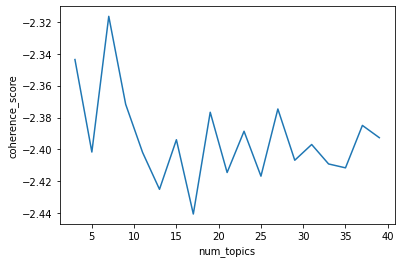

In [36]:
import seaborn as sns
 
ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [40]:
topicdf = pd.DataFrame.from_records(new_distro)

In [44]:
topicdf['primaryTopic'] = topicdf.idxmax(axis=1)

In [45]:
topicdf['primaryTopic'].value_counts()

6     2134
4     1529
5     1173
12    1084
0     1072
8     1025
13    1008
1      785
14     769
7      656
9      654
10     647
11     564
3      558
2      337
Name: primaryTopic, dtype: int64

In [47]:
# Are certin topics more helpful?
df['reviews.numHelpful'].describe()

count    13866.000000
mean         0.552430
std         10.034626
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        621.000000
Name: reviews.numHelpful, dtype: float64

In [50]:
# add new column
topicdf['numHelpful'] = df['reviews.numHelpful']

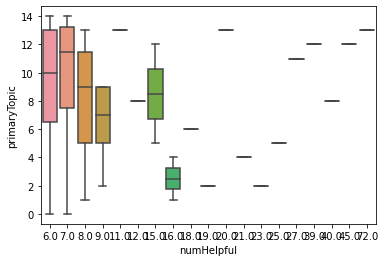

In [51]:
sns.boxplot(x="numHelpful", y="primaryTopic",  data=topicdf[(topicdf['numHelpful'] > 5) & (topicdf['numHelpful'] < 100)]);

In [56]:
# Which topics has the highest total number of helpful upvotes?
sample = topicdf[['primaryTopic', 'numHelpful']]
sample.groupby('primaryTopic').mean().sort_values(by='numHelpful', ascending=False)

,numHelpful
primaryTopic,
12,4.342541
13,3.953020
1,3.337662
5,2.675000
2,1.555556
8,1.032520
9,0.882353
11,0.823529
10,0.592233


## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling